Import the required Librarys
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv("data.csv")

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
df.sample(4)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
646,53,No,Travel_Rarely,868,Sales,8,3,Marketing,1,897,1,Male,73,3,4,Sales Executive,4,Married,11836,22789,5,Y,No,14,3,3,80,1,28,3,3,2,0,2,2
391,40,No,Travel_Rarely,555,Research & Development,2,3,Medical,1,521,2,Female,78,2,2,Laboratory Technician,3,Married,3448,13436,6,Y,No,22,4,2,80,1,20,3,3,1,0,0,0
701,53,No,Travel_Rarely,1376,Sales,2,2,Medical,1,981,3,Male,45,3,4,Manager,3,Divorced,14852,13938,6,Y,No,13,3,3,80,1,22,3,4,17,13,15,2
1040,40,No,Non-Travel,218,Research & Development,8,1,Medical,1,1468,4,Male,55,2,3,Research Director,2,Divorced,13757,25178,2,Y,No,11,3,3,80,1,16,5,3,9,8,4,8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# No null values

Features and target columns

In [6]:
features=df.drop("Attrition",axis=1)
target=df["Attrition"]

In [7]:
target=target.replace({'Yes':1,'No':0})

C:\Users\sanja\AppData\Local\Temp\ipykernel_15844\3723651564.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  target=target.replace({'Yes':1,'No':0})


Text(0.5, 1.0, 'age')

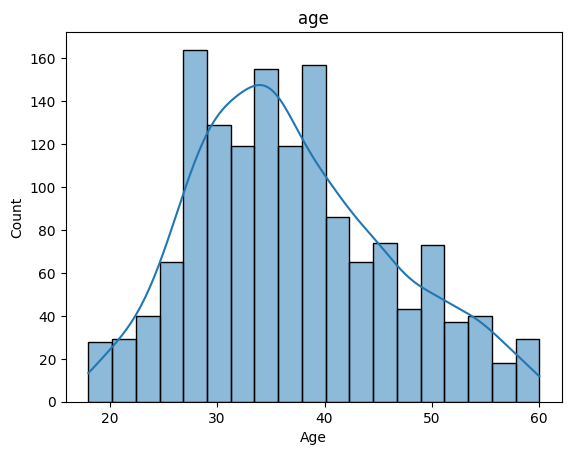

In [8]:
sns.histplot(df['Age'],kde=True)
plt.title('age')

<Axes: xlabel='Education', ylabel='count'>

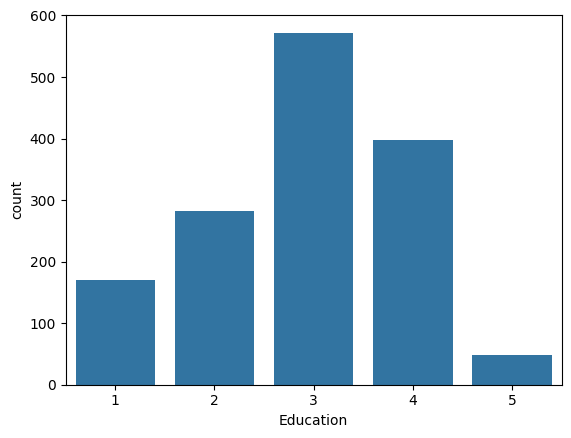

In [9]:
sns.countplot(x='Education',data=df)

<Axes: xlabel='Attrition', ylabel='YearsSinceLastPromotion'>

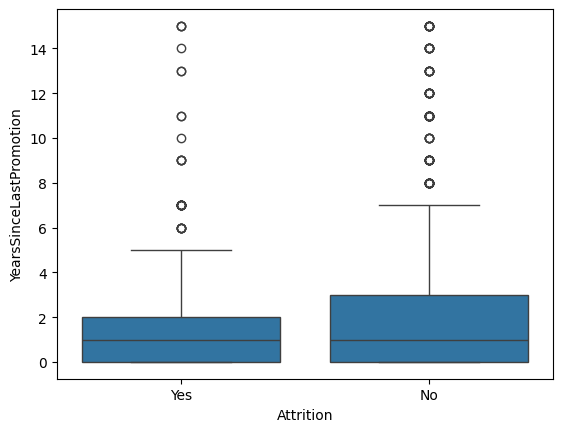

In [10]:
sns.boxplot(y='YearsSinceLastPromotion',data=df,x='Attrition')

# Select numerical and categorical columns and store the columns names in list

In [11]:
numaric=features.select_dtypes(include=np.number).columns.to_list()
cat=features.select_dtypes('object').columns.to_list()


# Using minmaxscalr to reduce the numeric values size

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scalar=MinMaxScaler().fit(df[numaric])

In [14]:
features[numaric]=scalar.transform(features[numaric])

In [15]:
features[numaric].head(5)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,0.715820,0.000000,0.25,0.0,0.000000,0.333333,0.914286,0.666667,0.25,1.000000,0.262454,0.698053,0.888889,0.000000,0.0,0.000000,0.0,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118
1,0.738095,0.126700,0.250000,0.00,0.0,0.000484,0.666667,0.442857,0.333333,0.25,0.333333,0.217009,0.916001,0.111111,0.857143,1.0,1.000000,0.0,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765
2,0.452381,0.909807,0.035714,0.25,0.0,0.001451,1.000000,0.885714,0.333333,0.00,0.666667,0.056925,0.012126,0.666667,0.285714,0.0,0.333333,0.0,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000
3,0.357143,0.923407,0.071429,0.75,0.0,0.001935,1.000000,0.371429,0.666667,0.00,0.666667,0.100053,0.845814,0.111111,0.000000,0.0,0.666667,0.0,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000
4,0.214286,0.350036,0.035714,0.00,0.0,0.002903,0.000000,0.142857,0.666667,0.00,0.333333,0.129489,0.583738,1.000000,0.071429,0.0,1.000000,0.0,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647


# encoding categorical columns values into numeric values

In [16]:
from sklearn.preprocessing import OneHotEncoder

In [17]:
encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore').fit(df[cat])

In [18]:
encoder_col=list(encoder.get_feature_names_out(cat))

In [19]:
features[encoder_col]=encoder.transform(features[cat])

In [20]:
features=features[numaric+encoder_col]

In [21]:
features

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.547619,0.715820,0.000000,0.25,0.0,0.000000,0.333333,0.914286,0.666667,0.25,1.000000,0.262454,0.698053,0.888889,0.000000,0.0,0.000000,0.0,0.000000,0.200,0.000000,0.000000,0.150,0.222222,0.000000,0.294118,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,0.738095,0.126700,0.250000,0.00,0.0,0.000484,0.666667,0.442857,0.333333,0.25,0.333333,0.217009,0.916001,0.111111,0.857143,1.0,1.000000,0.0,0.333333,0.250,0.500000,0.666667,0.250,0.388889,0.066667,0.411765,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.452381,0.909807,0.035714,0.25,0.0,0.001451,1.000000,0.885714,0.333333,0.00,0.666667,0.056925,0.012126,0.666667,0.285714,0.0,0.333333,0.0,0.000000,0.175,0.500000,0.666667,0.000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,0.357143,0.923407,0.071429,0.75,0.0,0.001935,1.000000,0.371429,0.666667,0.00,0.666667,0.100053,0.845814,0.111111,0.000000,0.0,0.666667,0.0,0.000000,0.200,0.500000,0.666667,0.200,0.388889,0.200000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.214286,0.350036,0.035714,0.00,0.0,0.002903,0.000000,0.142857,0.666667,0.00,0.333333,0.129489,0.583738,1.000000,0.071429,0.0,1.000000,0.0,0.333333,0.150,0.500000,0.666667,0.050,0.111111,0.133333,0.117647,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.559771,0.785714,0.25,0.0,0.996613,0.666667,0.157143,1.000000,0.25,1.000000,0.082254,0.409396,0.444444,0.428571,0.0,0.666667,0.0,0.333333,0.425,0.500000,0.666667,0.125,0.111111,0.000000,0.176471,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1466,0.500000,0.365784,0.178571,0.00,0.0,0.997097,1.000000,0.171429,0.333333,0.50,0.000000,0.472986,0.777474,0.444444,0.285714,0.0,0.000000,0.0,0.333333,0.225,0.833333,0.666667,0.175,0.388889,0.066667,0.411765,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1467,0.214286,0.037938,0.107143,0.50,0.0,0.998065,0.333333,0.814286,1.000000,0.25,0.333333,0.270300,0.123670,0.111111,0.642857,1.0,0.333333,0.0,0.333333,0.150,0.000000,0.666667,0.150,0.111111,0.000000,0.176471,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1468,0.738095,0.659270,0.035714,0.50,0.0,0.998549,1.000000,0.471429,0.3

# split the training data into train data and validation data, because test data dont have the traget column

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
train_x,test_x,train_y,test_y=train_test_split(features,target,test_size=0.3,random_state=42)

In [24]:
train_x.shape

(1029, 55)

In [25]:
test_x.shape

(441, 55)

# Define the model

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
model=RandomForestClassifier(random_state=42)

# import classification_report,confusion_matrix,accuracy_score

In [28]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


create a function,which used to fit the model and help to find the accuracy score for predicted target and actual actual target
---

In [29]:
def try_model(model,x,y,name="training"):
    # Fit the model
    model.fit(x,y)
    
    # Generate predictions
    preds = model.predict(x)
    #classification_report
    cl=classification_report(preds,y)
    print(cl)
    #confusion_matrix
    con=confusion_matrix(preds,y)
    #accuracy_score
    a=accuracy_score(y,preds)
   
    #confusion_matrix fig
    plt.figure()
    sns.heatmap(con, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return a

In [30]:
from sklearn.metrics import precision_recall_curve, average_precision_score


In [31]:
def predict_proba(model,x,y):
  model.fit(x,y)    
  # Generate predictions
  preds = model.predict(x)
  # Calculate precision-recall values
  precision, recall, thresholds = precision_recall_curve(y, preds)
  avg_precision = average_precision_score(y, preds)

  # Plot Precision-Recall Curve
  plt.figure(figsize=(8,6))
  plt.plot(recall, precision, color='green', label=f'Avg Precision = {avg_precision:.2f}')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision-Recall Curve')
  plt.legend(loc='lower left')
  plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       853
           1       1.00      1.00      1.00       176

    accuracy                           1.00      1029
   macro avg       1.00      1.00      1.00      1029
weighted avg       1.00      1.00      1.00      1029



1.0

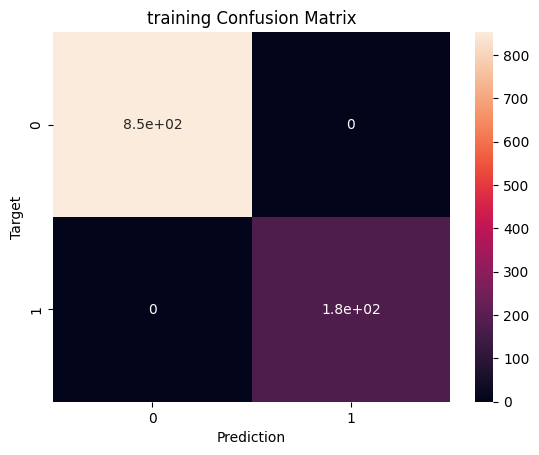

In [32]:
try_model(model,train_x,train_y)

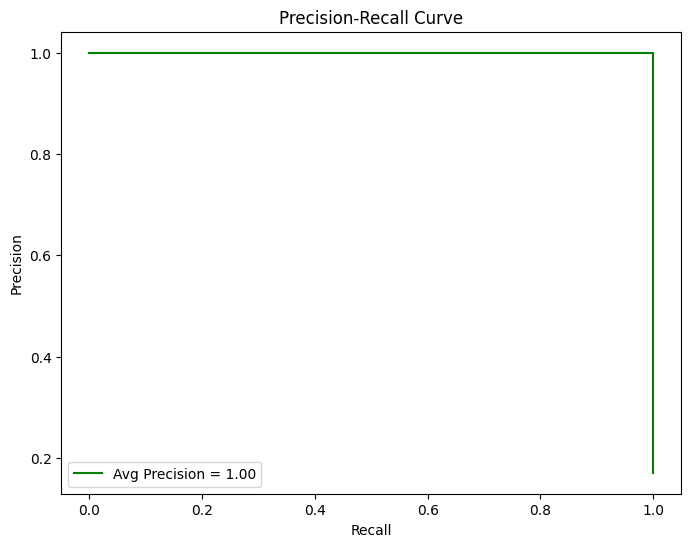

In [33]:
predict_proba(model,train_x,train_y)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       380
           1       1.00      1.00      1.00        61

    accuracy                           1.00       441
   macro avg       1.00      1.00      1.00       441
weighted avg       1.00      1.00      1.00       441



1.0

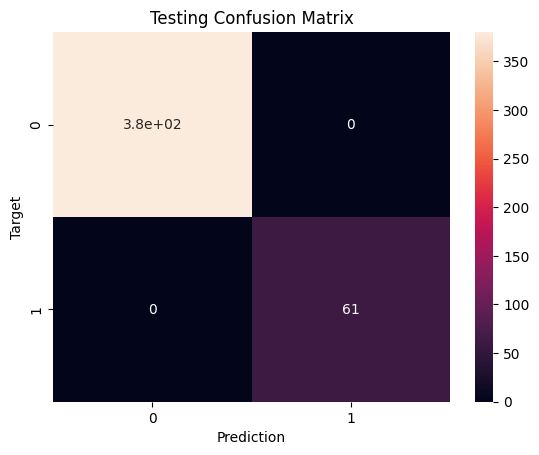

In [34]:
try_model(model,test_x,test_y,"Testing")

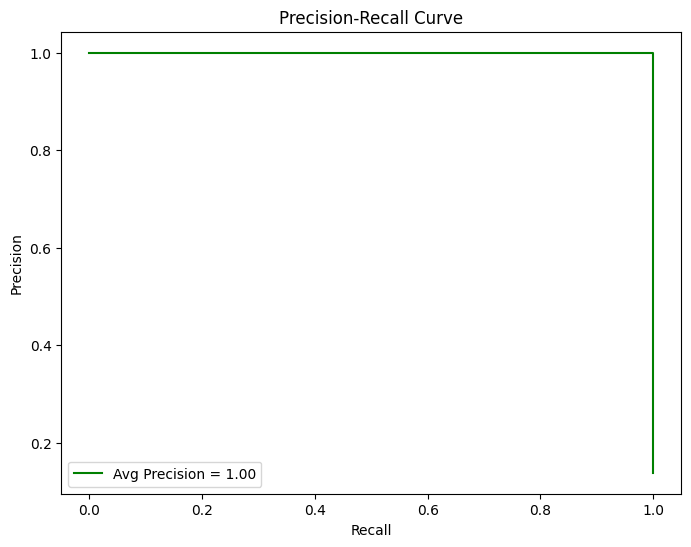

In [35]:
predict_proba(model,test_x,test_y)

Hyperparameter tuning
---

using grid search
---

Because the Normal RandomForest model is overfitting the training data

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
param_grid={
    'n_estimators':[100,150],
    'criterion': ["gini", "entropy", "log_loss"],
    'max_depth':[None,10,20],
    'min_samples_split':[2,5],
    'min_samples_leaf':[1,2],
    'bootstrap' :[True,False]
    }

In [38]:
clf=GridSearchCV(estimator=RandomForestClassifier(warm_start=True),param_grid=param_grid,cv=3,n_jobs=-1,verbose=1,scoring='accuracy')

In [39]:
clf.fit(train_x,train_y)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


,estimator,RandomForestC...rm_start=True)
,param_grid,"{'bootstrap': [True, False], 'criterion': ['gini', 'entropy', ...], 'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [40]:
print(clf.best_params_)

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [41]:
print(clf.best_score_)

0.8610301263362486


In [42]:
best_estimator=clf.best_estimator_

0.8662131519274376
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       427
           1       0.13      0.57      0.21        14

    accuracy                           0.87       441
   macro avg       0.56      0.72      0.57       441
weighted avg       0.96      0.87      0.90       441



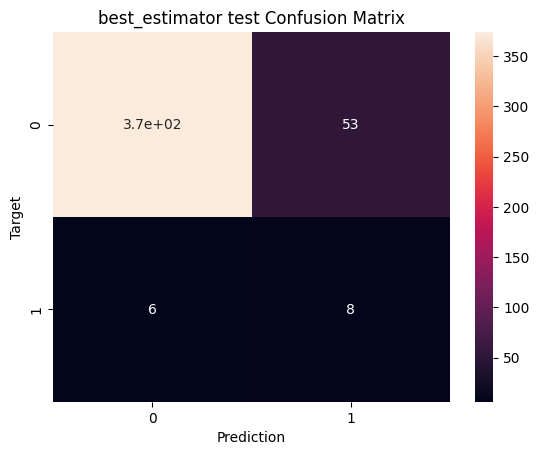

In [43]:
test_pre=best_estimator.predict(test_x)
print(accuracy_score(test_y,test_pre))
print(classification_report(test_pre,test_y))
con=confusion_matrix(test_pre,test_y)
plt.figure()
sns.heatmap(con, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('{} Confusion Matrix'.format('best_estimator test'));

c:\Users\sanja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:465: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


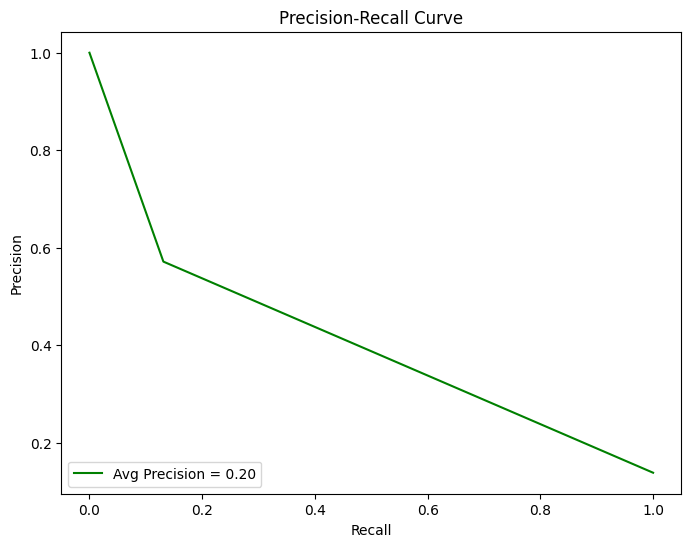

In [44]:
predict_proba(best_estimator,test_x,test_y)

In [ ]:
import joblib
joblib.dump(best_estimator,"GridSearch_RF_model")

['GridSearch_RF_model']

In [ ]:
joblib.dump(model,'Normal_RF_model')

['Normal_RF_model']